## Import Libraries

In [1]:
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Import Dataset

In [2]:
df = pd.read_csv(r'../Dataset/Golap_Dataset_Final.csv')

df.head()

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Laptop_Company,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link
0,1,https://www.flipkart.com/acer-aspire-3-core-i3...,acer aspire 3 core i3 11th gen_type(1),4.2,6587512,2,0,1,1,4,...,8,256,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/k...
1,2,https://www.flipkart.com/acer-aspire-3-core-i3...,acer aspire 3 core i3 11th gen_type(2),NaN,7338698,2,0,1,1,8,...,8,512,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/l...
2,3,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 10th gen_type(1),3.2,8656238,4,2,1,0,8,...,8,1000,intel core i5 10th gen,187,4.5,nvidia geforce gtx mx 330,16.50,4,57,https://rukminim2.flixcart.com/image/416/416/k...
3,4,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 11th gen_type(1),NaN,9220898,2,0,1,0,8,...,8,1000,intel core i5 11th gen,108,4.5,iris xe,17.50,4,4,https://rukminim2.flixcart.com/image/416/416/l...
4,5,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 11th gen_type(2),NaN,9390296,2,0,1,1,8,...,8,512,intel core i5 11th gen,108,4.5,intel iris xe,17.50,4,8,https://rukminim2.flixcart.com/image/416/416/x...


## Data Preprocessing

one shot : 
Laptop Type
Processor Brand
Storage Type
Memory Type
OS
Laptop Company
Processor
GPU

In [3]:
df.columns

Index(['Laptop_Index', 'Link_References', 'Laptop_Name', 'User_Rating',
       'Price_in_IDR', 'Laptop_Type', 'Dedicated_GPU_in_GB', 'Processor_Brand',
       'Storage_Type', 'RAM_in_GB', 'RAM_Type', 'Memory_Type', 'OS',
       'Touchscreen_Features', 'Screen_Size_in_Inch', 'Weight_in_Kg',
       'Refresh_Rate', 'Screen_Resolution', 'Laptop_Company',
       'Storage_Capacity', 'Processor', 'CPU_Rank', 'Battery_Lifetime_in_Hrs',
       'GPU', 'GPU_Benchmark_Score', 'RAM_Type_Tokenized',
       'GPU_Processor_Tokenized', 'Image_Link'],
      dtype='object')

In [4]:
# X_columns = [
#     "Laptop_Company",           # one_shot
#     "Laptop_Type",              # one_shot
#     "Processor_Brand",          # one_shot
#     "Processor",                # ?
#     "Storage_Type",             # binary
#     "Storage_Capacity",         # numerical
#     "Memory_Type",              # binary
#     "RAM_Type",                 # one_shot
#     "RAM_in_GB",                # numerical
#     "GPU_Processor_Tokenized",  # numerical
#     "Dedicated_GPU_in_GB",      # one_shot
#     "Weight_in_Kg",             # numerical
#     "Screen_Size_in_Inch",      # numerical
#     "Screen_Resolution",        # categorical
#     "Touchscreen_Features"      # binary
# ]

# y_columns = ["Price_in_Rupee"]

# X_df = df[X_columns]
# y_df = df[y_columns]

In [5]:
# X_df.head()

In [6]:
# df["Processor"].unique()

## Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Laptop_Index             983 non-null    int64  
 1   Link_References          983 non-null    object 
 2   Laptop_Name              983 non-null    object 
 3   User_Rating              689 non-null    float64
 4   Price_in_IDR             983 non-null    int64  
 5   Laptop_Type              983 non-null    int64  
 6   Dedicated_GPU_in_GB      983 non-null    int64  
 7   Processor_Brand          983 non-null    int64  
 8   Storage_Type             983 non-null    int64  
 9   RAM_in_GB                983 non-null    int64  
 10  RAM_Type                 983 non-null    object 
 11  Memory_Type              983 non-null    int64  
 12  OS                       983 non-null    int64  
 13  Touchscreen_Features     983 non-null    int64  
 14  Screen_Size_in_Inch      9

In [8]:
X = df.drop(columns=[
    'Laptop_Index', 
    'Link_References',
    'Laptop_Name',
    'User_Rating',
    'RAM_Type',
    'Processor',
    'GPU',
    'Image_Link',
    'Price_in_IDR'
])

y = df['Price_in_IDR']


###### cleaning data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.values.reshape(-1, 1)  # Convert y_train to 2D
y_test = y_test.values.reshape(-1, 1)    # Convert y_test to 2D

# Now apply the StandardScaler
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [11]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

## Model ML

In [12]:
model = Sequential(
    [   
        tf.keras.Input(shape=(19,)),
        Dense(units = 15, activation = 'relu', name = "Layer_1"),        
        Dense(units = 10, activation = 'relu', name = "Layer_2"),        
        Dense(units = 1)                                                 
    ], name="GoLap_Prediction"
)

In [13]:
model.summary()

Model: "GoLap_Prediction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 15)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
[layer1, layer2, layer3] = model.layers

In [15]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (19, 15), b1 shape = (15,)
W2 shape = (15, 10), b2 shape = (10,)
W3 shape = (10, 1), b3 shape = (1,)


In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=MeanSquaredError
)

In [17]:
history = model.fit(
    X_train,  
    y_train,
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6239 - val_loss: 0.6504
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3495 - val_loss: 0.5653
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3882 - val_loss: 0.5094
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3074 - val_loss: 0.4793
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2751 - val_loss: 0.4535
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2152 - val_loss: 0.4316
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2576 - val_loss: 0.4196
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2673 - val_loss: 0.3981
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1939 - val_loss: 0.3907
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1738 - val_loss: 0.3858
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1419 - val_loss: 0.3763
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1404 - val_lo

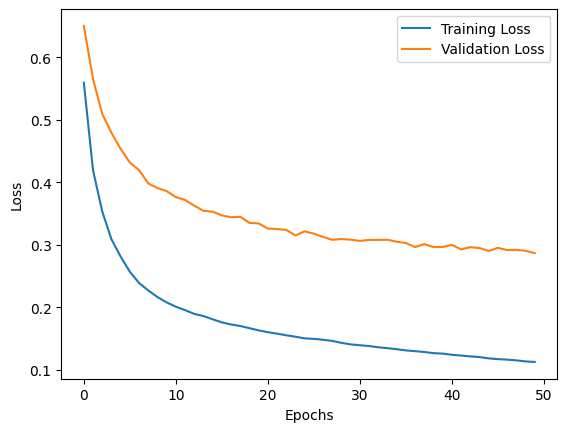

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2903 
Test Loss: 0.28644514083862305


In [20]:
y_test = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [21]:
y_ori = scaler.inverse_transform(y_test)

In [22]:
print(y_ori)

[[13399301. ]
 [14272783. ]
 [12597987. ]
 [12897093. ]
 [16486060. ]
 [13365874. ]
 [12401480. ]
 [12963351. ]
 [11550232. ]
 [13928909. ]
 [13182086. ]
 [11861158. ]
 [14386240. ]
 [12810887. ]
 [14886172. ]
 [14631105. ]
 [12540338. ]
 [21352746. ]
 [16486060. ]
 [13164421. ]
 [13391190. ]
 [14672798. ]
 [14523132. ]
 [ 4269676. ]
 [13460227. ]
 [13412421. ]
 [24422442. ]
 [13157697. ]
 [12461745. ]
 [13051270. ]
 [16669301. ]
 [13887765. ]
 [18378270. ]
 [12456721. ]
 [12266335. ]
 [12573619. ]
 [16124952. ]
 [19150666. ]
 [13458484. ]
 [13612631. ]
 [12553198. ]
 [13952814. ]
 [12397600. ]
 [13009568. ]
 [15211065. ]
 [21668096. ]
 [12599192. ]
 [12144819. ]
 [12296061. ]
 [12988188. ]
 [13354271. ]
 [12736379. ]
 [16851218. ]
 [11972346. ]
 [16486060. ]
 [11019244. ]
 [13136074. ]
 [14136018. ]
 [13450561. ]
 [14074807. ]
 [12874244. ]
 [11359613. ]
 [19716814. ]
 [12979803. ]
 [11487549. ]
 [12821924. ]
 [12043923. ]
 [12832716. ]
 [12986231. ]
 [15874024. ]
 [22501716. ]
 [1217

In [23]:
# dont know how to save it
# model.save('model.keras')